In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
x_train = data.iloc[:int(len(data)*0.8)].Hours
y_train = data.iloc[:int(len(data)*0.8)].Scores

x_test = data.iloc[int(len(data)*0.8):].Hours
y_test = data.iloc[int(len(data)*0.8):].Scores



In [18]:
class LinearRegression:
    def loss_fuction(self, a, b ,x_train, y_train):
        total_error = 0
        for i in range(len(x_train)):
            x = x_train[i]
            y = y_train[i]
            predicted = a * x + b
            total_error += (y - predicted)**2
        total_error = total_error/len(x_train)
        return total_error

    def gradient_descent(self,a,b,x_train, y_train, learning_rate):
        a_gradient = 0
        b_gradient = 0
        n=len(x_train)
        for i in range(n):
            x = x_train[i]
            y = y_train[i]
            pred = a * x + b 
            a_gradient += -(2/n)*x*(y - pred)
            b_gradient += -(2/n)*(y-pred)
        step_a = a_gradient*learning_rate
        step_b = b_gradient*learning_rate
        new_a = a - step_a
        new_b = b - step_b
        return new_a,new_b
    def predict(self, x_test):
        return [round(a * x + b, 2) for x in x_test]

    def score(self, predictions, y_test):
        rmse = 0
        y_test = np.array(y_test)
        predictions = np.array(predictions)
        n = len(y_test)
        for i in range(n):
            rmse += (predictions[i] - y_test[i])**2
        return np.sqrt(rmse/n)


In [19]:
learning_rate = 0.001
a = 1
b = 0
epochs = 1000
model = LinearRegression()
for i in range(epochs):
    a , b = model.gradient_descent(a,b,x_train,y_train,learning_rate)
    if i % 50 == 0:
        print(f"the value of a = {a:.4f} , b = {b:.4f}")
print(f"the final value of a = {a:.4f} , b = {b:.4f}")

the value of a = 1.5650 , b = 0.0907
the value of a = 9.4798 , b = 1.3856
the value of a = 9.7591 , b = 1.4641
the value of a = 9.7641 , b = 1.4982
the value of a = 9.7594 , b = 1.5300
the value of a = 9.7545 , b = 1.5611
the value of a = 9.7496 , b = 1.5916
the value of a = 9.7449 , b = 1.6214
the value of a = 9.7402 , b = 1.6507
the value of a = 9.7357 , b = 1.6793
the value of a = 9.7312 , b = 1.7073
the value of a = 9.7268 , b = 1.7348
the value of a = 9.7226 , b = 1.7616
the value of a = 9.7184 , b = 1.7879
the value of a = 9.7143 , b = 1.8137
the value of a = 9.7102 , b = 1.8390
the value of a = 9.7063 , b = 1.8637
the value of a = 9.7025 , b = 1.8879
the value of a = 9.6987 , b = 1.9116
the value of a = 9.6950 , b = 1.9348
the final value of a = 9.6914 , b = 1.9571


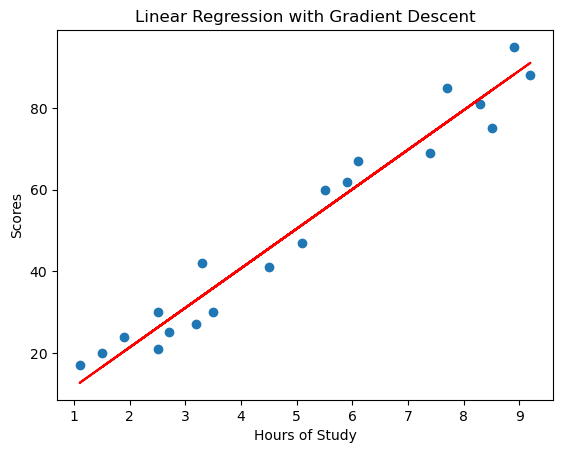

In [20]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.title('Linear Regression with Gradient Descent')
plt.show()


In [21]:
print(model.predict(x_test))
print(np.array(y_test))

[28.12, 48.48, 38.78, 68.83, 77.55, 64.95]
[30 54 35 76 86 70]
